Efficient Net learning and understanding


In [1]:
%pip install tensorflow
%pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip show tensorflow


Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: D:\Users\newac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


This notebook discuss on the learning of efficient and working on dataset where words have been written and our final model will be able to predict which word the predicted word is

In [5]:
import tensorflow as tf
from keras.applications.efficientnet import EfficientNetB0
from PIL import Image
from sklearn.model_selection import train_test_split
import os 
import pandas as pd
import numpy as np
import matplotlib


In [7]:
def convert_image_to_tensor(path):
    img=Image.open(path)
    img=img.resize((224,224))
    img=np.asarray(img)
    return img

images_list=[]
labels_list=[]
labels_map={}
label_val=0
i='Data_1/natural_images'
for folder in os.listdir(i):
    labels_map[label_val]=folder
    for file in os.listdir(i+'/'+folder):
        images_list.append(i+'/'+folder+'/'+file)
        labels_list.append(label_val)
    label_val+=1

labels_map


{0: 'airplane',
 1: 'car',
 2: 'cat',
 3: 'dog',
 4: 'flower',
 5: 'fruit',
 6: 'motorbike',
 7: 'person'}

In [14]:
print(len(images_list),len(labels_list))
layers=tf.keras.layers.CategoryEncoding(num_tokens=len(list(set(labels_list))),output_mode="one_hot")
labels_list=np.array(layers(labels_list))
images_list=np.array([convert_image_to_tensor(i) for i in images_list])


6899 6899


TypeError: unhashable type: 'numpy.ndarray'

In [15]:
X,Xtest,y,Ytest=train_test_split(images_list,labels_list)

customizing sizing the images and creating transfer learning architecture


In [18]:
input_val=tf.keras.layers.Input(shape=[224,224,3])

model=EfficientNetB0(include_top=False,input_tensor=input_val,weights='imagenet')

for i in range(int(len(model.layers) *0.75)):
    model.layers[i].trainable=False

x=tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
x=tf.keras.layers.BatchNormalization()(x)

top_dropout_rate=0.2
x=tf.keras.layers.Dropout(top_dropout_rate,name="top_dropout")(x)

output=tf.keras.layers.Dense(len(labels_map),activation="softmax",name="pred")(x)

model=tf.keras.Model(inputs=input_val,outputs=output)
model.compile(
    optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"]

)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_4         │ (None, 224, 224,  │          0 │ input_layer_2[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 224, 224,  │          7 │ rescaling_4[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_5         │ (None, 224, 224,  │          0 │ normalization_2[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_5[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,064,939 (15.51 MB)

 Trainable params: 2,684,872 (10.24 MB)

 Non-trainable params: 1,380,067 (5.26 MB)

In [21]:
callback=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_loss',mode='auto',restore_best_weights=True)
hist=model.fit(X,y,validation_data=(Xtest,Ytest),epochs=3,callbacks=[callback],batch_size=128)

Epoch 1/3
41/41 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.9933 - loss: 0.0286 - val_accuracy: 0.9896 - val_loss: 0.0405
Epoch 2/3
41/41 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.9972 - loss: 0.0079 - val_accuracy: 0.9977 - val_loss: 0.0093
Epoch 3/3
41/41 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.9979 - loss: 0.0079 - val_accuracy: 0.9959 - val_loss: 0.0118


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
flower


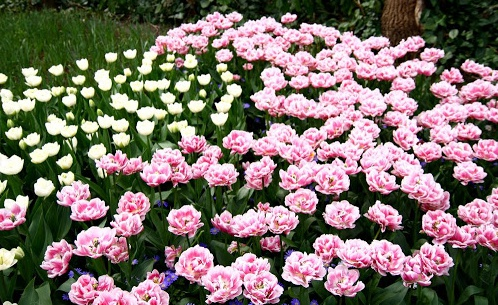

In [35]:
#inference Testing

def take_inference_and_predict(model):
    inference_= input('Enter path of the file to test:')
    img=Image.open(inference_)
    inference_=convert_image_to_tensor(inference_)
    inference_=inference_.reshape(1,inference_.shape[0],inference_.shape[1],inference_.shape[2])
    print(labels_map[np.argmax(model.predict(inference_))])
    return img

img=take_inference_and_predict(model)
img